In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


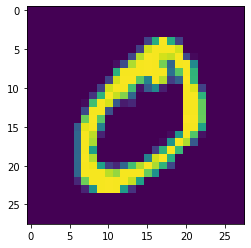

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
HISTORY = {} 
'''
  contains info about each model
  key: intuition behind model
  trainable_params: no of trainable params
  non_trainable_params: no of non trainable params
  scores: list of scores for each training session
  val_acc, epoch: highest val_acc and epoch number for each training session
'''

In [42]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8, 1, 1, activation='relu', use_bias=False)) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu"

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_92 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_92 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 24, 24, 20)        1800      
_________________________________________________________________
batch_normalization_93 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_93 (Dropout)         (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 24, 24, 8)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False)`


In [43]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

history = []
scores = []
for i in range(4):
  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
  h = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
  history.append(h)
  score = model.evaluate(X_test, Y_test, verbose=0)
  scores.append(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 15s 248us/step - loss: 0.5289 - acc: 0.8521 - val_loss: 0.0941 - val_acc: 0.9814
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 100us/step - loss: 0.2575 - acc: 0.9224 - val_loss: 0.0698 - val_acc: 0.9858
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 103us/step - loss: 0.2017 - acc: 0.9400 - val_loss: 0.0435 - val_acc: 0.9898
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 102us/step - loss: 0.1731 - acc: 0.9458 - val_loss: 0.0400 - val_acc: 0.9905
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [44]:
# find out the highest val_acc in the 4 runs of the model
max_acc = [(max(history[i].history['val_acc']), i) for i in range(4)]
print(max_acc)

[(0.9943, 0), (0.9953, 1), (0.996, 2), (0.9956, 3)]


In [45]:
print(scores)

[[0.022299894432898145, 0.9939], [0.019910878463128757, 0.9946], [0.019506690664345298, 0.9948], [0.017212786722480996, 0.9951]]


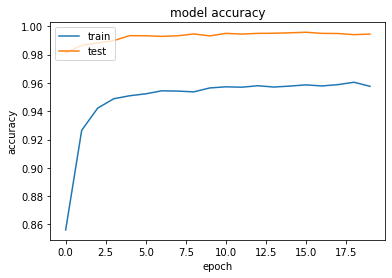

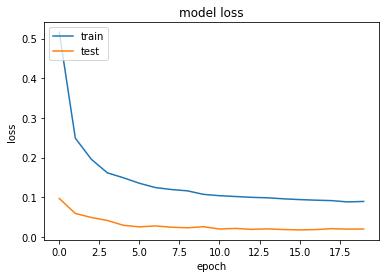

In [21]:
import matplotlib.pyplot as plt

def plot(history): # to look at individual history
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [46]:
# Careful before running cell
HISTORY['10 20 8 kernels before max pooling'] = {
    'trainable_params': 12882,
    'non_trainable_params': 208,
    'scores': scores,
    'acc': max_acc
}
print(HISTORY)

{'original without bias': {'trainable_params': 16228, 'non_trainable_params': 244, 'scores': [[0.01808474469958569, 0.9954], [0.019497062973319226, 0.9952], [0.01994227597291588, 0.9949], [0.021506337354881406, 0.9952]], 'acc': [(0.9959, 0), (0.9956, 1), (0.9956, 2), (0.9955, 3)]}, '10 20 8 kernels before max pooling': {'trainable_params': 12882, 'non_trainable_params': 208, 'scores': [[0.022299894432898145, 0.9939], [0.019910878463128757, 0.9946], [0.019506690664345298, 0.9948], [0.017212786722480996, 0.9951]], 'acc': [(0.9943, 0), (0.9953, 1), (0.996, 2), (0.9956, 3)]}}


In [0]:
HISTORY['10 20 8 kernels before max pooling']['log'] = '''
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 15s 248us/step - loss: 0.5289 - acc: 0.8521 - val_loss: 0.0941 - val_acc: 0.9814
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 100us/step - loss: 0.2575 - acc: 0.9224 - val_loss: 0.0698 - val_acc: 0.9858
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 103us/step - loss: 0.2017 - acc: 0.9400 - val_loss: 0.0435 - val_acc: 0.9898
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 102us/step - loss: 0.1731 - acc: 0.9458 - val_loss: 0.0400 - val_acc: 0.9905
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==============================] - 6s 103us/step - loss: 0.1540 - acc: 0.9483 - val_loss: 0.0325 - val_acc: 0.9914
Epoch 6/20

Epoch 00006: LearningRateScheduler setting learning rate to 0.0011560694.
60000/60000 [==============================] - 6s 100us/step - loss: 0.1401 - acc: 0.9510 - val_loss: 0.0333 - val_acc: 0.9917
Epoch 7/20

Epoch 00007: LearningRateScheduler setting learning rate to 0.0010295127.
60000/60000 [==============================] - 6s 102us/step - loss: 0.1289 - acc: 0.9547 - val_loss: 0.0306 - val_acc: 0.9916
Epoch 8/20

Epoch 00008: LearningRateScheduler setting learning rate to 0.0009279307.
60000/60000 [==============================] - 6s 102us/step - loss: 0.1247 - acc: 0.9541 - val_loss: 0.0280 - val_acc: 0.9919
Epoch 9/20

Epoch 00009: LearningRateScheduler setting learning rate to 0.0008445946.
60000/60000 [==============================] - 6s 103us/step - loss: 0.1193 - acc: 0.9545 - val_loss: 0.0259 - val_acc: 0.9934
Epoch 10/20

Epoch 00010: LearningRateScheduler setting learning rate to 0.0007749935.
60000/60000 [==============================] - 6s 103us/step - loss: 0.1158 - acc: 0.9534 - val_loss: 0.0234 - val_acc: 0.9933
Epoch 11/20

Epoch 00011: LearningRateScheduler setting learning rate to 0.0007159905.
60000/60000 [==============================] - 6s 101us/step - loss: 0.1135 - acc: 0.9545 - val_loss: 0.0291 - val_acc: 0.9922
Epoch 12/20

Epoch 00012: LearningRateScheduler setting learning rate to 0.000665336.
60000/60000 [==============================] - 6s 101us/step - loss: 0.1089 - acc: 0.9554 - val_loss: 0.0219 - val_acc: 0.9933
Epoch 13/20

Epoch 00013: LearningRateScheduler setting learning rate to 0.0006213753.
60000/60000 [==============================] - 6s 102us/step - loss: 0.1068 - acc: 0.9562 - val_loss: 0.0230 - val_acc: 0.9937
Epoch 14/20

Epoch 00014: LearningRateScheduler setting learning rate to 0.0005828638.
60000/60000 [==============================] - 6s 101us/step - loss: 0.1049 - acc: 0.9551 - val_loss: 0.0210 - val_acc: 0.9939
Epoch 15/20

Epoch 00015: LearningRateScheduler setting learning rate to 0.0005488474.
60000/60000 [==============================] - 6s 103us/step - loss: 0.1023 - acc: 0.9557 - val_loss: 0.0218 - val_acc: 0.9938
Epoch 16/20

Epoch 00016: LearningRateScheduler setting learning rate to 0.0005185825.
60000/60000 [==============================] - 6s 103us/step - loss: 0.1011 - acc: 0.9550 - val_loss: 0.0215 - val_acc: 0.9935
Epoch 17/20

Epoch 00017: LearningRateScheduler setting learning rate to 0.000491481.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0977 - acc: 0.9572 - val_loss: 0.0196 - val_acc: 0.9942
Epoch 18/20

Epoch 00018: LearningRateScheduler setting learning rate to 0.0004670715.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0961 - acc: 0.9576 - val_loss: 0.0207 - val_acc: 0.9933
Epoch 19/20

Epoch 00019: LearningRateScheduler setting learning rate to 0.0004449718.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0958 - acc: 0.9564 - val_loss: 0.0204 - val_acc: 0.9943
Epoch 20/20

Epoch 00020: LearningRateScheduler setting learning rate to 0.000424869.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0929 - acc: 0.9581 - val_loss: 0.0223 - val_acc: 0.9939
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 232us/step - loss: 0.1151 - acc: 0.9524 - val_loss: 0.0430 - val_acc: 0.9878
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 102us/step - loss: 0.1077 - acc: 0.9533 - val_loss: 0.0295 - val_acc: 0.9920
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 102us/step - loss: 0.1010 - acc: 0.9537 - val_loss: 0.0242 - val_acc: 0.9932
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0957 - acc: 0.9564 - val_loss: 0.0243 - val_acc: 0.9937
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0956 - acc: 0.9553 - val_loss: 0.0224 - val_acc: 0.9930
Epoch 6/20

Epoch 00006: LearningRateScheduler setting learning rate to 0.0011560694.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0920 - acc: 0.9574 - val_loss: 0.0199 - val_acc: 0.9944
Epoch 7/20

Epoch 00007: LearningRateScheduler setting learning rate to 0.0010295127.
60000/60000 [==============================] - 6s 100us/step - loss: 0.0896 - acc: 0.9577 - val_loss: 0.0202 - val_acc: 0.9947
Epoch 8/20

Epoch 00008: LearningRateScheduler setting learning rate to 0.0009279307.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0877 - acc: 0.9581 - val_loss: 0.0196 - val_acc: 0.9945
Epoch 9/20

Epoch 00009: LearningRateScheduler setting learning rate to 0.0008445946.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0870 - acc: 0.9589 - val_loss: 0.0210 - val_acc: 0.9939
Epoch 10/20

Epoch 00010: LearningRateScheduler setting learning rate to 0.0007749935.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0858 - acc: 0.9570 - val_loss: 0.0208 - val_acc: 0.9944
Epoch 11/20

Epoch 00011: LearningRateScheduler setting learning rate to 0.0007159905.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0837 - acc: 0.9594 - val_loss: 0.0204 - val_acc: 0.9939
Epoch 12/20

Epoch 00012: LearningRateScheduler setting learning rate to 0.000665336.
60000/60000 [==============================] - 6s 99us/step - loss: 0.0828 - acc: 0.9595 - val_loss: 0.0201 - val_acc: 0.9938
Epoch 13/20

Epoch 00013: LearningRateScheduler setting learning rate to 0.0006213753.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0844 - acc: 0.9582 - val_loss: 0.0194 - val_acc: 0.9953
Epoch 14/20

Epoch 00014: LearningRateScheduler setting learning rate to 0.0005828638.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0828 - acc: 0.9598 - val_loss: 0.0211 - val_acc: 0.9943
Epoch 15/20

Epoch 00015: LearningRateScheduler setting learning rate to 0.0005488474.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0806 - acc: 0.9604 - val_loss: 0.0200 - val_acc: 0.9944
Epoch 16/20

Epoch 00016: LearningRateScheduler setting learning rate to 0.0005185825.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0812 - acc: 0.9593 - val_loss: 0.0213 - val_acc: 0.9940
Epoch 17/20

Epoch 00017: LearningRateScheduler setting learning rate to 0.000491481.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0805 - acc: 0.9587 - val_loss: 0.0193 - val_acc: 0.9945
Epoch 18/20

Epoch 00018: LearningRateScheduler setting learning rate to 0.0004670715.
60000/60000 [==============================] - 6s 100us/step - loss: 0.0795 - acc: 0.9605 - val_loss: 0.0208 - val_acc: 0.9947
Epoch 19/20

Epoch 00019: LearningRateScheduler setting learning rate to 0.0004449718.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0801 - acc: 0.9605 - val_loss: 0.0211 - val_acc: 0.9942
Epoch 20/20

Epoch 00020: LearningRateScheduler setting learning rate to 0.000424869.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0798 - acc: 0.9591 - val_loss: 0.0199 - val_acc: 0.9946
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 238us/step - loss: 0.0961 - acc: 0.9564 - val_loss: 0.0309 - val_acc: 0.9910
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0935 - acc: 0.9563 - val_loss: 0.0285 - val_acc: 0.9923
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0894 - acc: 0.9564 - val_loss: 0.0277 - val_acc: 0.9931
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0871 - acc: 0.9576 - val_loss: 0.0213 - val_acc: 0.9940
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==============================] - 6s 100us/step - loss: 0.0845 - acc: 0.9586 - val_loss: 0.0192 - val_acc: 0.9949
Epoch 6/20

Epoch 00006: LearningRateScheduler setting learning rate to 0.0011560694.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0828 - acc: 0.9581 - val_loss: 0.0203 - val_acc: 0.9945
Epoch 7/20

Epoch 00007: LearningRateScheduler setting learning rate to 0.0010295127.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0832 - acc: 0.9581 - val_loss: 0.0186 - val_acc: 0.9952
Epoch 8/20

Epoch 00008: LearningRateScheduler setting learning rate to 0.0009279307.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0791 - acc: 0.9607 - val_loss: 0.0190 - val_acc: 0.9947
Epoch 9/20

Epoch 00009: LearningRateScheduler setting learning rate to 0.0008445946.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0814 - acc: 0.9581 - val_loss: 0.0183 - val_acc: 0.9949
Epoch 10/20

Epoch 00010: LearningRateScheduler setting learning rate to 0.0007749935.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0802 - acc: 0.9599 - val_loss: 0.0193 - val_acc: 0.9948
Epoch 11/20

Epoch 00011: LearningRateScheduler setting learning rate to 0.0007159905.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0790 - acc: 0.9599 - val_loss: 0.0175 - val_acc: 0.9951
Epoch 12/20

Epoch 00012: LearningRateScheduler setting learning rate to 0.000665336.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0769 - acc: 0.9609 - val_loss: 0.0184 - val_acc: 0.9946
Epoch 13/20

Epoch 00013: LearningRateScheduler setting learning rate to 0.0006213753.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0772 - acc: 0.9603 - val_loss: 0.0174 - val_acc: 0.9953
Epoch 14/20

Epoch 00014: LearningRateScheduler setting learning rate to 0.0005828638.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0759 - acc: 0.9612 - val_loss: 0.0170 - val_acc: 0.9960
Epoch 15/20

Epoch 00015: LearningRateScheduler setting learning rate to 0.0005488474.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0765 - acc: 0.9606 - val_loss: 0.0188 - val_acc: 0.9953
Epoch 16/20

Epoch 00016: LearningRateScheduler setting learning rate to 0.0005185825.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0768 - acc: 0.9600 - val_loss: 0.0181 - val_acc: 0.9947
Epoch 17/20

Epoch 00017: LearningRateScheduler setting learning rate to 0.000491481.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0740 - acc: 0.9608 - val_loss: 0.0182 - val_acc: 0.9953
Epoch 18/20

Epoch 00018: LearningRateScheduler setting learning rate to 0.0004670715.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0755 - acc: 0.9605 - val_loss: 0.0170 - val_acc: 0.9955
Epoch 19/20

Epoch 00019: LearningRateScheduler setting learning rate to 0.0004449718.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0757 - acc: 0.9600 - val_loss: 0.0168 - val_acc: 0.9953
Epoch 20/20

Epoch 00020: LearningRateScheduler setting learning rate to 0.000424869.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0759 - acc: 0.9605 - val_loss: 0.0195 - val_acc: 0.9948
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 15s 248us/step - loss: 0.0917 - acc: 0.9569 - val_loss: 0.0237 - val_acc: 0.9930
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0875 - acc: 0.9557 - val_loss: 0.0231 - val_acc: 0.9939
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0836 - acc: 0.9585 - val_loss: 0.0202 - val_acc: 0.9946
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0809 - acc: 0.9582 - val_loss: 0.0210 - val_acc: 0.9940
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0801 - acc: 0.9593 - val_loss: 0.0215 - val_acc: 0.9936
Epoch 6/20

Epoch 00006: LearningRateScheduler setting learning rate to 0.0011560694.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0787 - acc: 0.9590 - val_loss: 0.0216 - val_acc: 0.9943
Epoch 7/20

Epoch 00007: LearningRateScheduler setting learning rate to 0.0010295127.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0769 - acc: 0.9591 - val_loss: 0.0204 - val_acc: 0.9943
Epoch 8/20

Epoch 00008: LearningRateScheduler setting learning rate to 0.0009279307.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0760 - acc: 0.9600 - val_loss: 0.0214 - val_acc: 0.9949
Epoch 9/20

Epoch 00009: LearningRateScheduler setting learning rate to 0.0008445946.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0758 - acc: 0.9612 - val_loss: 0.0180 - val_acc: 0.9947
Epoch 10/20

Epoch 00010: LearningRateScheduler setting learning rate to 0.0007749935.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0768 - acc: 0.9598 - val_loss: 0.0174 - val_acc: 0.9952
Epoch 11/20

Epoch 00011: LearningRateScheduler setting learning rate to 0.0007159905.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0749 - acc: 0.9599 - val_loss: 0.0207 - val_acc: 0.9947
Epoch 12/20

Epoch 00012: LearningRateScheduler setting learning rate to 0.000665336.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0759 - acc: 0.9602 - val_loss: 0.0186 - val_acc: 0.9948
Epoch 13/20

Epoch 00013: LearningRateScheduler setting learning rate to 0.0006213753.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0742 - acc: 0.9607 - val_loss: 0.0202 - val_acc: 0.9946
Epoch 14/20

Epoch 00014: LearningRateScheduler setting learning rate to 0.0005828638.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0739 - acc: 0.9595 - val_loss: 0.0177 - val_acc: 0.9946
Epoch 15/20

Epoch 00015: LearningRateScheduler setting learning rate to 0.0005488474.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0738 - acc: 0.9611 - val_loss: 0.0169 - val_acc: 0.9950
Epoch 16/20

Epoch 00016: LearningRateScheduler setting learning rate to 0.0005185825.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0714 - acc: 0.9623 - val_loss: 0.0176 - val_acc: 0.9952
Epoch 17/20

Epoch 00017: LearningRateScheduler setting learning rate to 0.000491481.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0719 - acc: 0.9614 - val_loss: 0.0176 - val_acc: 0.9956
Epoch 18/20

Epoch 00018: LearningRateScheduler setting learning rate to 0.0004670715.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0742 - acc: 0.9599 - val_loss: 0.0178 - val_acc: 0.9948
Epoch 19/20

Epoch 00019: LearningRateScheduler setting learning rate to 0.0004449718.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0729 - acc: 0.9612 - val_loss: 0.0178 - val_acc: 0.9946
Epoch 20/20

Epoch 00020: LearningRateScheduler setting learning rate to 0.000424869.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0723 - acc: 0.9605 - val_loss: 0.0172 - val_acc: 0.9951
'''

In [56]:
 HISTORY

Pretty printing has been turned ON


{'10 20 8 kernels before max pooling': {'acc': [(0.9943, 0),
   (0.9953, 1),
   (0.996, 2),
   (0.9956, 3)],
  'log': '\nTrain on 60000 samples, validate on 10000 samples\nEpoch 1/20\n\nEpoch 00001: LearningRateScheduler setting learning rate to 0.003.\n60000/60000 [==============================] - 15s 248us/step - loss: 0.5289 - acc: 0.8521 - val_loss: 0.0941 - val_acc: 0.9814\nEpoch 2/20\n\nEpoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.\n60000/60000 [==============================] - 6s 100us/step - loss: 0.2575 - acc: 0.9224 - val_loss: 0.0698 - val_acc: 0.9858\nEpoch 3/20\n\nEpoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.\n60000/60000 [==============================] - 6s 103us/step - loss: 0.2017 - acc: 0.9400 - val_loss: 0.0435 - val_acc: 0.9898\nEpoch 4/20\n\nEpoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.\n60000/60000 [==============================] - 6s 102us/step - loss: 0.1731 - acc: 0.9458 - va